<a href="https://colab.research.google.com/github/Howl06/classify_project_final/blob/main/tensorflow.keras/01_anomaly_detection_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [17]:
# number 1
normal_no = 1
# number 7
abnormal_no = 7

# Training
x_normal = x_train[y_train == normal_no]

# Test
x_test_normal = x_test[y_test == normal_no]
x_abnormal = np.concatenate((x_train[y_train == abnormal_no], 
                             x_test[y_test == abnormal_no]))

x_normal = np.expand_dims(x_normal, axis=-1)

x_test_normal = np.expand_dims(x_test_normal, axis=-1)
x_abnormal = np.expand_dims(x_abnormal, axis=-1)

# For Dense autoencoder
# x_normal = x_normal.reshape((x_normal.shape[0], -1))
# x_test_normal = x_test_normal.reshape((x_test_normal.shape[0], -1))
# x_abnormal = x_abnormal.reshape((x_abnormal.shape[0], -1))

In [18]:
x_normal.shape, x_test_normal.shape , x_abnormal.shape

((6742, 28, 28, 1), (1135, 28, 28, 1), (7293, 28, 28, 1))

In [19]:
x_normal = x_normal / 255.
x_test_normal = x_test_normal / 255.
x_abnormal = x_abnormal / 255.

In [20]:
# Model1: UNet with Conv2DTranspose
activation = 'selu'

# Encoder
input_layer = Input(shape=(28, 28, 1))
l = Conv2D(filters=8, kernel_size=(3,3), activation=activation, padding='same')(input_layer)
c1 = Conv2D(filters=8, kernel_size=(3,3), activation=activation, padding='same')(l)
l = MaxPool2D(strides=(2,2))(l)
l = Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding='same')(l)
c2 = Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding='same')(l)
l = MaxPool2D(strides=(2,2))(c2)
c3 = Conv2D(filters=32, kernel_size=(3,3), activation=activation, padding='same')(l)

# Decoder
l = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3), 
                 c2], axis=-1)
l = Conv2D(filters=32, kernel_size=(2,2), activation=activation, padding='same')(l)
l = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(l), 
                 c1], axis=-1)
l = Conv2D(filters=16, kernel_size=(2,2), activation=activation, padding='same')(l)
l = Conv2D(filters=64, kernel_size=(1,1), activation=activation)(l)
output_layer = Conv2D(filters=1, kernel_size=(1,1), activation='sigmoid')(l)
                                                         
model = Model(input_layer, output_layer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 28, 28, 8)    80          ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 8)   0           ['conv2d_9[0][0]']               
                                                                                                  
 conv2d_11 (Conv2D)             (None, 14, 14, 16)   1168        ['max_pooling2d_2[0][0]']        
                                                                                            

In [ ]:
# Model2: Unet with Conv2DTranspose
activation = 'tanh'
input_layer = Input(shape=(28, 28, 1))
l = Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding='same')(input_layer)
c1 = Conv2D(filters=16, kernel_size=(3,3), activation=activation, padding='same')(l)
l = MaxPool2D(strides=(2,2))(l)
l = Conv2D(filters=32, kernel_size=(3,3), activation=activation, padding='same')(l)
c2 = Conv2D(filters=32, kernel_size=(3,3), activation=activation, padding='same')(l)
l = MaxPool2D(strides=(2,2))(c2)
c3 = Conv2D(filters=64, kernel_size=(3,3), activation=activation, padding='same')(l)

l = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c3)
l = Conv2D(filters=64, kernel_size=(2,2), activation=activation, padding='same')(l)
l = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(l)
l = Conv2D(filters=64, kernel_size=(2,2), activation=activation, padding='same')(l)
l = Conv2D(filters=128, kernel_size=(1,1), activation=activation)(l)
output_layer = Conv2D(filters=1, kernel_size=(1,1), activation='sigmoid')(l)
                                                         
model = Model(input_layer, output_layer)
# model.summary()

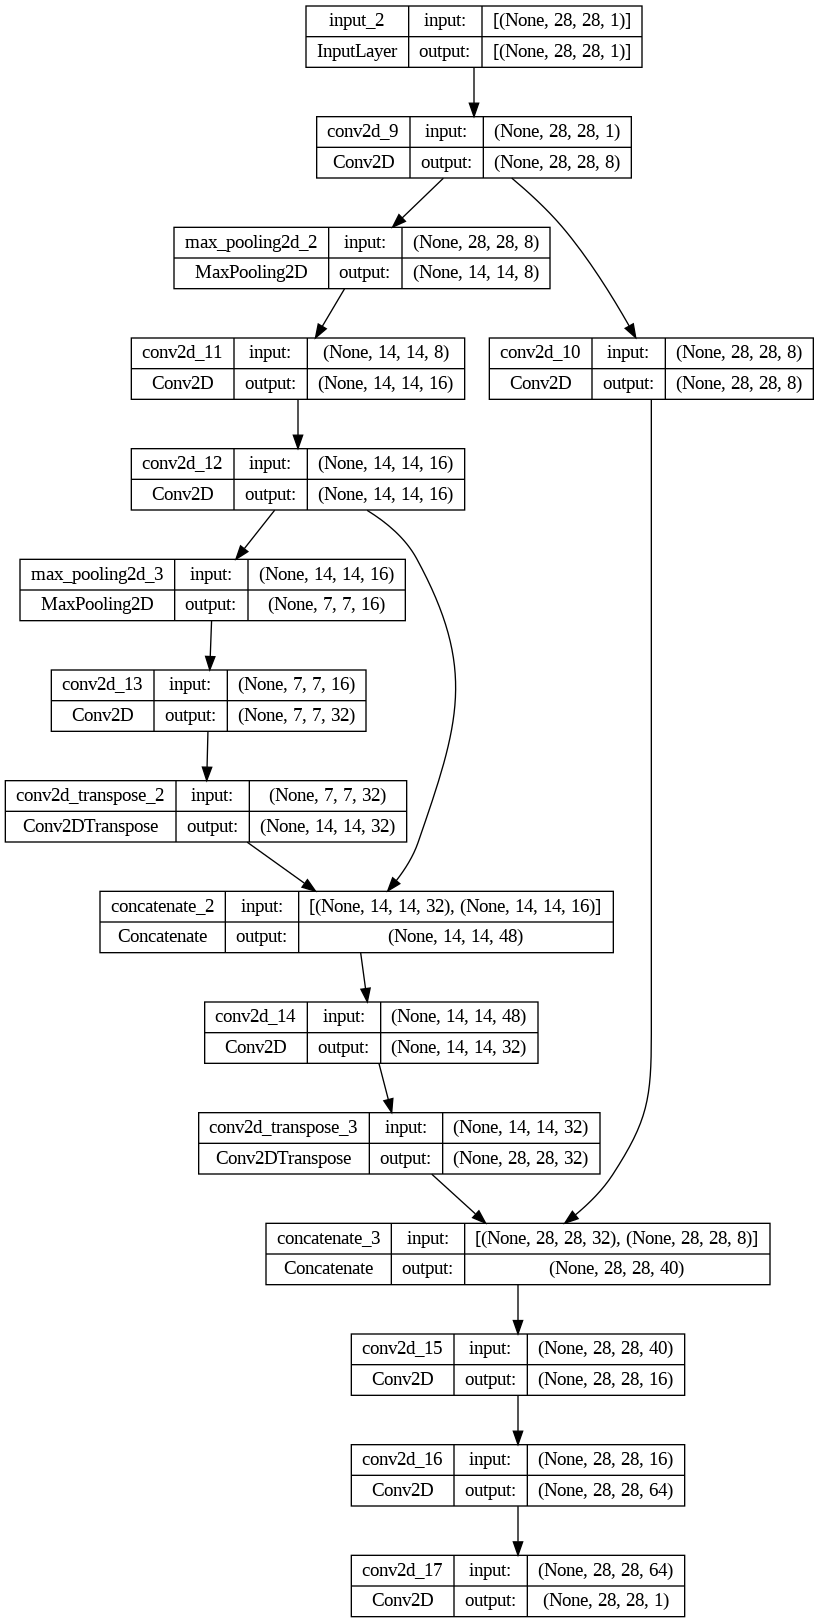

In [21]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# # Model 2: Dense encoder
# inputs = Input((784,))
# x = Dense(100, activation='tanh')(inputs)
# x = Dense(50, activation='tanh')(x)
# x = Dense(25, activation='tanh')(x)
# x = Dense(50, activation='tanh')(x)
# x = Dense(100, activation='tanh')(x)
# x = Dense(784, activation='sigmoid')(x)
# model = Model(inputs, x)
# model.summary()

In [22]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=1e-4), 
              loss=keras.losses.MeanSquaredError())

In [23]:
h = model.fit(x_normal, x_normal, 
              batch_size=128, 
              epochs=50)

Epoch 1/50
53/53 [==============================] - 30s 513ms/step - loss: 0.1972
Epoch 2/50
53/53 [==============================] - 28s 521ms/step - loss: 0.0717
Epoch 3/50
53/53 [==============================] - 29s 540ms/step - loss: 0.0144
Epoch 4/50
53/53 [==============================] - 27s 510ms/step - loss: 0.0064
Epoch 5/50
53/53 [==============================] - 27s 511ms/step - loss: 0.0044
Epoch 6/50
53/53 [==============================] - 27s 509ms/step - loss: 0.0034
Epoch 7/50
53/53 [==============================] - 27s 509ms/step - loss: 0.0027
Epoch 8/50
53/53 [==============================] - 27s 509ms/step - loss: 0.0023
Epoch 9/50
53/53 [==============================] - 27s 514ms/step - loss: 0.0020
Epoch 10/50
53/53 [==============================] - 27s 510ms/step - loss: 0.0018
Epoch 11/50
53/53 [==============================] - 27s 509ms/step - loss: 0.0017
Epoch 12/50
53/53 [==============================] - 27s 510ms/step - loss: 0.0015
Epoch 13/50
5

In [24]:
pred_normal = model.predict(x_test_normal)# test: 1
pred_abnormal = model.predict(x_abnormal) # test: 7
pred_train = model.predict(x_normal) # train: 1

211/211 [==============================] - 10s 46ms/step


In [25]:
pred_normal.shape, pred_abnormal.shape, pred_train.shape

((1135, 28, 28, 1), (7293, 28, 28, 1), (6742, 28, 28, 1))

In [26]:
def mse(x, y):
    return (np.square(x - y)).mean(axis=(1,2,3))

In [27]:
error_normal = mse(pred_normal, x_test_normal)
error_abnormal = mse(pred_abnormal, x_abnormal)
error_train_normal = mse(pred_train, x_normal)

In [28]:
error_normal.shape, error_abnormal.shape, error_train_normal.shape

((1135,), (7293,), (6742,))

In [29]:
np.mean(error_normal), np.mean(error_abnormal), np.mean(error_train_normal)

(0.0002786069102433843, 0.0009385238125941365, 0.0002787591409834831)

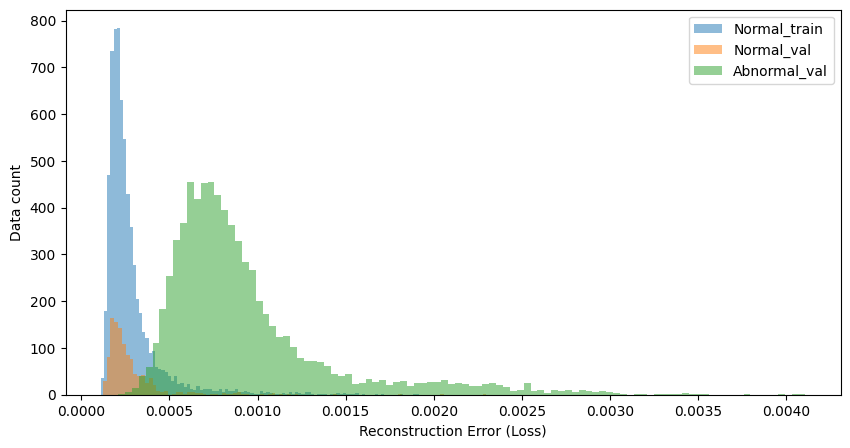

In [30]:
plt.figure(figsize=(10,5))
plt.hist(error_train_normal, bins=100, alpha=0.5) # Blue
plt.hist(error_normal, bins=100, alpha=0.5) # Orange
plt.hist(error_abnormal, bins=100, alpha=0.5) # Green
plt.legend(['Normal_train', 'Normal_val', 'Abnormal_val'])
plt.ylabel("Data count")
plt.xlabel("Reconstruction Error (Loss)")
plt.show()

In [31]:
normal_mean = error_train_normal.mean()
normal_std = error_train_normal.std()

normal_mean, normal_std

(0.0002787591409834831, 0.00017173623445007974)

In [42]:
threshold1 = normal_mean + normal_std
threshold1

0.0004504953754335628

In [43]:
threshold2 = normal_mean + normal_std * 2
threshold2

0.0006222316098836425

In [44]:
threshold3 = normal_mean + normal_std * 3
threshold3

0.0007939678443337223

In [53]:
all_error = np.concatenate([error_train_normal, error_abnormal])
all_truth = np.array([0]*error_train_normal.shape[0] + [1]*error_abnormal.shape[0])



all_pred = all_truth.copy()
all_pred[all_error>=threshold1] = 1
all_pred[all_error<threshold1] = 0

from sklearn.metrics import classification_report

In [54]:
# Threshold 1
print(classification_report(all_truth, all_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      6742
           1       0.92      0.96      0.94      7293

    accuracy                           0.94     14035
   macro avg       0.94      0.94      0.94     14035
weighted avg       0.94      0.94      0.94     14035



In [67]:
all_pred[all_error>=threshold2] = 1
all_pred[all_error<threshold2] = 0

In [68]:
# Threshold 2
print(classification_report(all_truth, all_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      6742
           1       0.95      0.77      0.85      7293

    accuracy                           0.86     14035
   macro avg       0.87      0.87      0.86     14035
weighted avg       0.88      0.86      0.86     14035



In [69]:
threshold_1_2 = (threshold2 + threshold1 ) / 2
threshold_1_2

0.0005363634926586027

In [71]:
all_pred[all_error >= threshold_1_2] = 1
all_pred[all_error < threshold_1_2] = 0

In [72]:
# Threshold mid 1~2
print(classification_report(all_truth, all_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6742
           1       0.94      0.89      0.92      7293

    accuracy                           0.92     14035
   macro avg       0.92      0.92      0.92     14035
weighted avg       0.92      0.92      0.92     14035



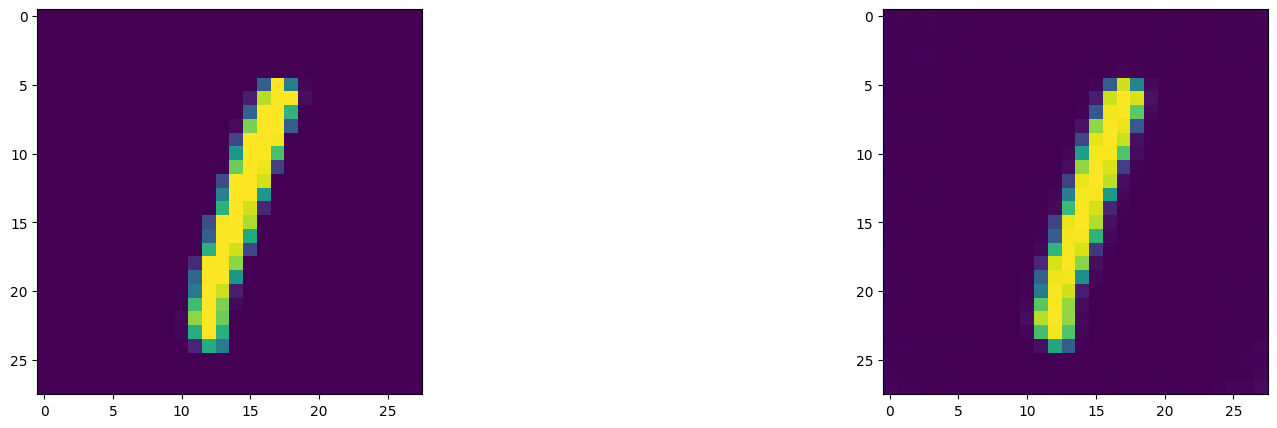

0.006810985962849654

In [73]:
# Normal
idx = 1
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
img_normal = x_test_normal[idx, :, :, 0]
img_reconstruct = pred_normal[idx, :, :, 0]
plt.imshow(img_normal)
plt.subplot(1, 2, 2)
plt.imshow(img_reconstruct)
plt.show()

np.mean(np.abs(img_normal - img_reconstruct))

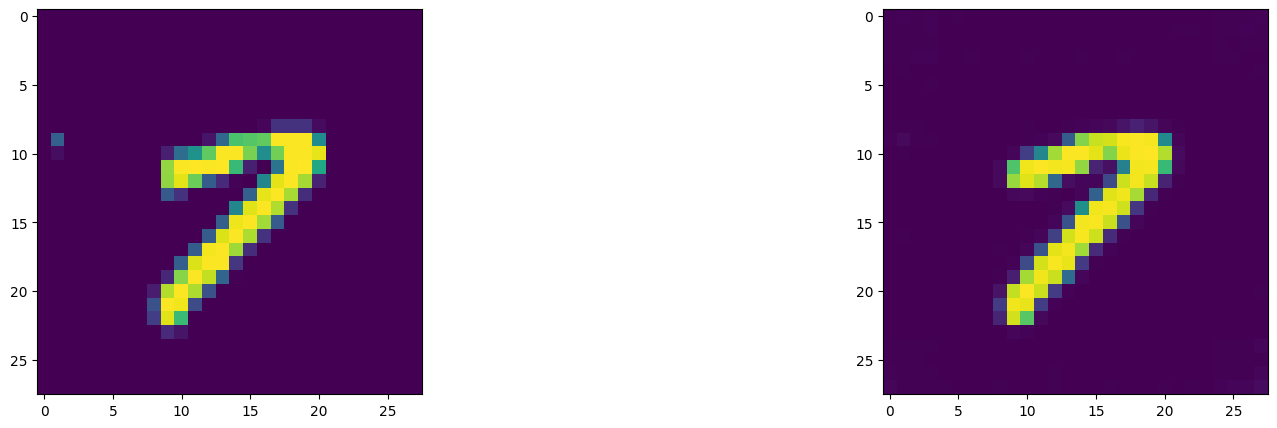

0.01066571240213753

In [74]:
# Abnormal
idx = 1
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
img_abnormal = x_abnormal[idx, :, :, 0]
img_reconstruct = pred_abnormal[idx, :, :, 0]
plt.imshow(img_abnormal)
plt.subplot(1, 2, 2)
plt.imshow(img_reconstruct)
plt.show()

np.mean(np.abs(img_abnormal - img_reconstruct))

0.010218946928253588


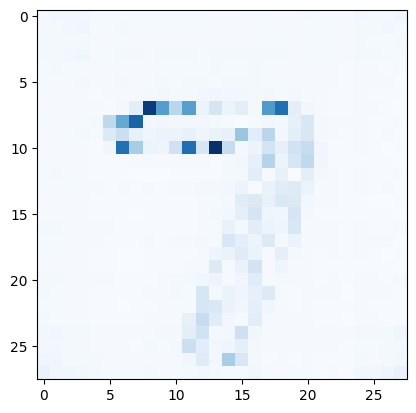

In [81]:
idx = np.random.randint(0, len(x_abnormal))
error = pred_abnormal[idx, :, :, 0]-x_abnormal[idx, :, :, 0]
error = np.abs(error)
print(np.mean(error))
plt.imshow(error, cmap='Blues')

0.007661051304830564


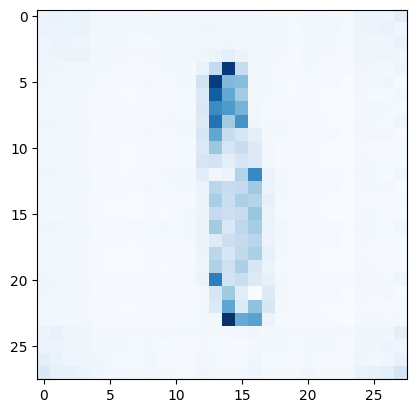

In [82]:
idx = np.random.randint(0, len(x_normal))
error = pred_train[idx, :, :, 0]-x_normal[idx, :, :, 0]
error = np.abs(error)
print(np.mean(error))
plt.imshow(error, cmap='Blues')